In [172]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [173]:
# Chargement des données 
df = pd.read_csv('gapminder_data_graphs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3675 non-null   object 
 1   continent    3675 non-null   object 
 2   year         3675 non-null   int64  
 3   life_exp     3675 non-null   float64
 4   hdi_index    3563 non-null   float64
 5   co2_consump  3671 non-null   float64
 6   gdp          3633 non-null   float64
 7   services     3675 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 229.8+ KB


On voit qu'on a 3 colonnes nous permettant de classer les données (pays, continent, année) ainsi que 5 colonnes contenant des valeurs numériques (espérance de vie, Indice de Développement Humain, consommation de CO2, Produit Intérieur Brut par habitant et pourcentage de travailleurs dans le secteur tertiaire). 

# Data Cleaning

country          0
continent        0
year             0
life_exp         0
hdi_index      112
co2_consump      4
gdp             42
services         0
dtype: int64

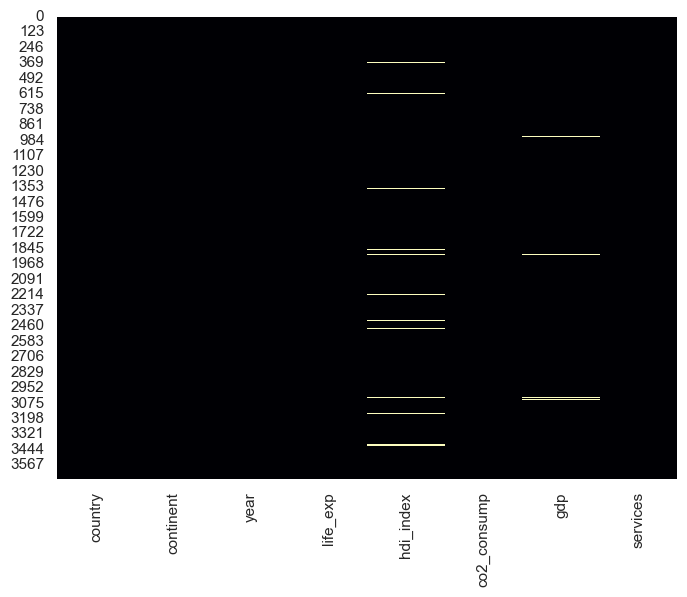

In [174]:
# On regarde les valeurs manquantes
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

df.isnull().sum()

In [175]:
# Affichage des villes et années avec valeurs d'IDH manquantes
df[df['hdi_index'].isna()][['country', 'year']]

country  year
63     Angola  1998
189   Bahamas  1998
190   Bahamas  1999
357    Bhutan  1998
358    Bhutan  1999
...       ...   ...
3572  Vanuatu  2000
3573  Vanuatu  2001
3574  Vanuatu  2002
3575  Vanuatu  2003
3576  Vanuatu  2004

[112 rows x 2 columns]

Il est cohérent que plusieurs valeurs pour l'indice de développement humain soient manquantes dans le cas de certains pays car il n'était probablement possible de les calculer à l'époque.

In [176]:
# Affichage des villes et années avec les valeurs de PIB manquantes
df[df['gdp'].isna()][['country', 'year']]

country  year
0               Afghanistan  1998
1               Afghanistan  1999
2               Afghanistan  2000
3               Afghanistan  2001
945                Djibouti  1998
946                Djibouti  1999
947                Djibouti  2000
948                Djibouti  2001
949                Djibouti  2002
950                Djibouti  2003
951                Djibouti  2004
952                Djibouti  2005
953                Djibouti  2006
954                Djibouti  2007
955                Djibouti  2008
956                Djibouti  2009
957                Djibouti  2010
958                Djibouti  2011
959                Djibouti  2012
1890                Liberia  1998
1891                Liberia  1999
1911                  Libya  1998
2688                  Qatar  1998
2689                  Qatar  1999
2793  Sao Tome and Principe  1998
2794  Sao Tome and Principe  1999
2795  Sao Tome and Principe  2000
3024            South Sudan  1998
3025            South Sudan  1999
3026            South Sudan  2000
3027            South Sudan  2001
3028            South Sudan  2002
3029            South Sudan  2003
3030            South Sudan  2004
3031            South Sudan  2005
3032            South Sudan  2006
3033            South Sudan  2007
3042            South Sudan  2016
3043            South Sudan  2017
3044            South Sudan  2018
3276            Timor-Leste  1998
3277            Timor-Leste  1999

Dans le même cas que précédemment, ces pays manquent de données pour le Produit Brut Intérieur car les données n'étaient probablement pas disponibles à l'époque.

In [177]:
# Affichage des villes et années avec les valeurs de consommation de CO2 manquantes
df[df['co2_consump'].isna()][['country', 'year']]

country  year
3276  Timor-Leste  1998
3277  Timor-Leste  1999
3278  Timor-Leste  2000
3279  Timor-Leste  2001

Avant 2002, le Timor oriental était une province de l'Indonésie. Nous n'avons donc pas de données pour cette période.

In [178]:
# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace = True)

# Vérification
df.isnull().sum()

country        0
continent      0
year           0
life_exp       0
hdi_index      0
co2_consump    0
gdp            0
services       0
dtype: int64

On regarde si on a des données dupliquées dans notre jeu de données.

In [179]:
# On regarde si on a des données dupliquées
print("Nombre de données dupliquées : " , df.duplicated().sum())

Nombre de données dupliquées :  0


On finit par modifier les index des données pour ne pas avoir de valeurs manquantes.

In [180]:
df = df.reset_index(drop=True)

# Analyse des données

## Analyse descriptive ( moyenne, médiane, écart-type, histogrammes, boxplots, graphiques de lignes)

In [181]:
# Moyenne des données par pays
df_without_year = df.drop('year', axis = 1)
df_mean = df_without_year.groupby('country').mean(numeric_only=True)
df_mean

life_exp  hdi_index  co2_consump           gdp   services
country                                                                
Afghanistan  59.911765   0.461059     0.194371    482.176471  31.135294
Albania      77.080952   0.731095     1.395476   3111.428571  37.328571
Algeria      73.571429   0.697095     3.241905   3739.047619  56.228571
Angola       58.830000   0.498700     1.052550   3517.500000  47.320000
Argentina    75.404762   0.811905     4.259524  12246.190476  76.057143
...                ...        ...          ...           ...        ...
Vanuatu      64.564286   0.591000     0.463071   2798.571429  30.057143
Vietnam      73.071429   0.643095     1.315286   1539.904762  28.566667
Yemen        66.171429   0.478571     0.816429   2243.333333  53.690476
Zambia       53.366667   0.501619     0.214190   1073.190476  27.423810
Zimbabwe     51.895238   0.473667     0.859333   1362.904762  26.138095

[175 rows x 5 columns]

In [182]:
# moyenne la plus élevée pour chaque colonne
print("Pays avec les moyennes les plus hautes : \n", df_mean.idxmax())
print("Pays avec les moyenne minimum : \n",df_mean.idxmin())

Pays avec les moyennes les plus hautes : 
 life_exp                  Japan
hdi_index                Norway
co2_consump               Qatar
gdp                  Luxembourg
services       Hong Kong, China
dtype: object
Pays avec les moyenne minimum : 
 life_exp       Central African Republic
hdi_index                         Niger
co2_consump            Congo, Dem. Rep.
gdp                             Burundi
services                        Burundi
dtype: object


In [183]:
# Médianne des données par pays
df_median = df_without_year.groupby('country').median(numeric_only=True)
print(df_median)


             life_exp  hdi_index  co2_consump      gdp  services
country                                                         
Afghanistan     60.50      0.472       0.2450    533.0     30.70
Albania         77.60      0.728       1.4600   3300.0     36.90
Algeria         73.90      0.702       3.2700   3850.0     56.80
Angola          59.15      0.508       1.1600   3800.0     46.65
Argentina       75.70      0.821       4.4200  12900.0     75.60
...               ...        ...          ...      ...       ...
Vanuatu         64.60      0.591       0.4995   2805.0     29.00
Vietnam         73.00      0.647       1.3100   1500.0     30.30
Yemen           66.50      0.483       0.8950   2380.0     55.70
Zambia          54.10      0.503       0.1890   1070.0     23.00
Zimbabwe        49.70      0.442       0.8530   1430.0     25.80

[175 rows x 5 columns]


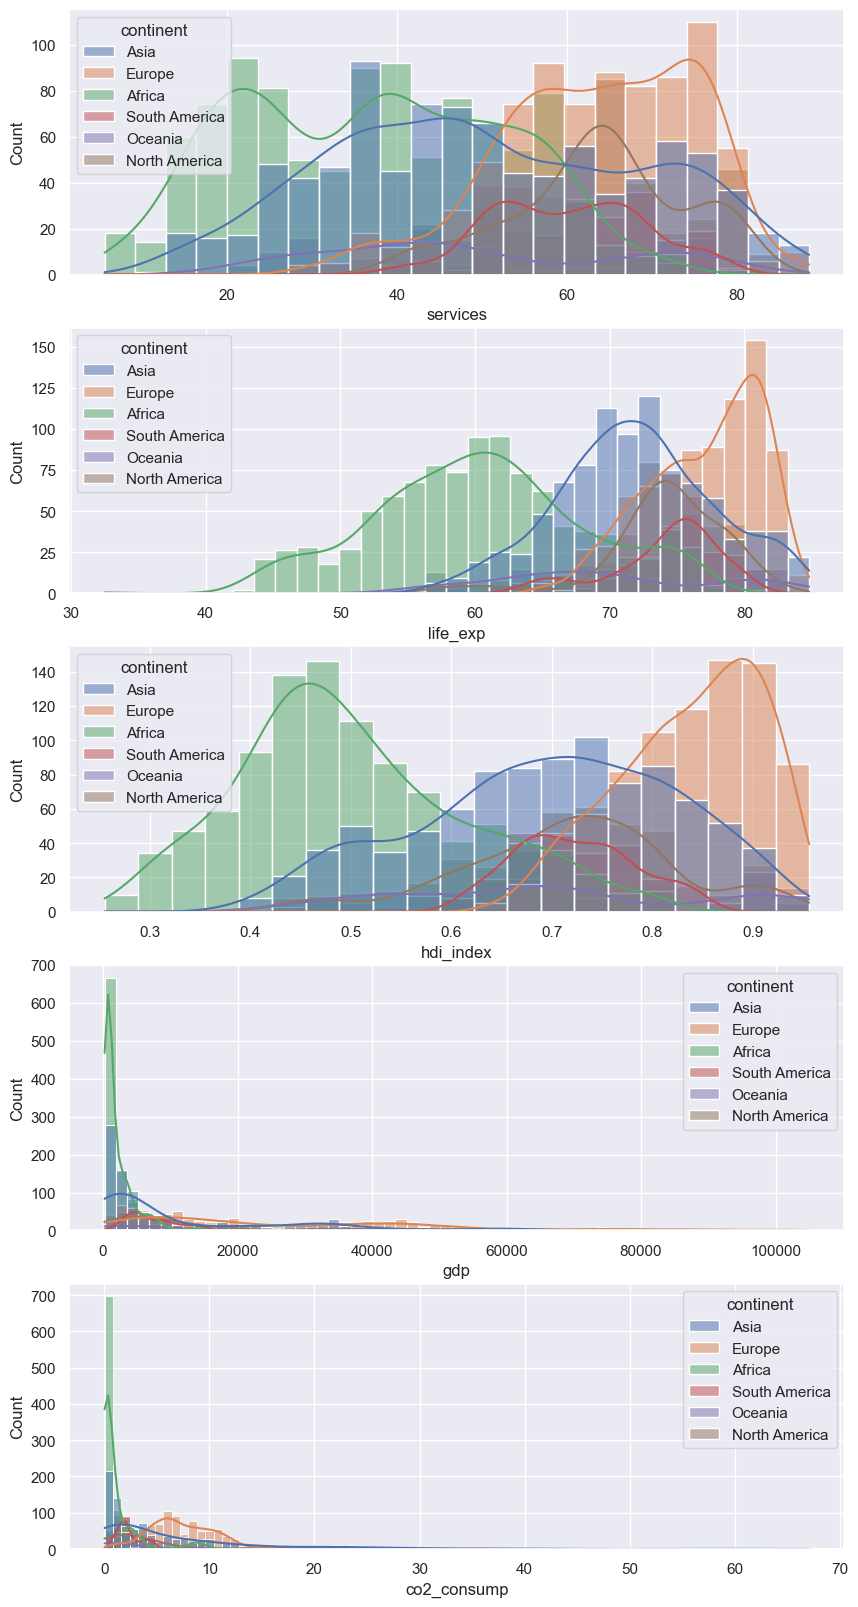

In [184]:
# Histogramme comparaison des varibles par continent
fig, ax = plt.subplots(5, 1, figsize = (10, 20))
sns.histplot(data = df, x = 'services', hue = 'continent', ax = ax[0], kde = True)
sns.histplot(data = df, x = 'life_exp', hue = 'continent', ax = ax[1], kde = True)
sns.histplot(data = df, x = 'hdi_index', hue = 'continent', ax = ax[2], kde = True)
sns.histplot(data = df, x = 'gdp', hue = 'continent', ax = ax[3], kde = True)
sns.histplot(data = df, x = 'co2_consump', hue = 'continent', ax = ax[4], kde = True)
plt.show()

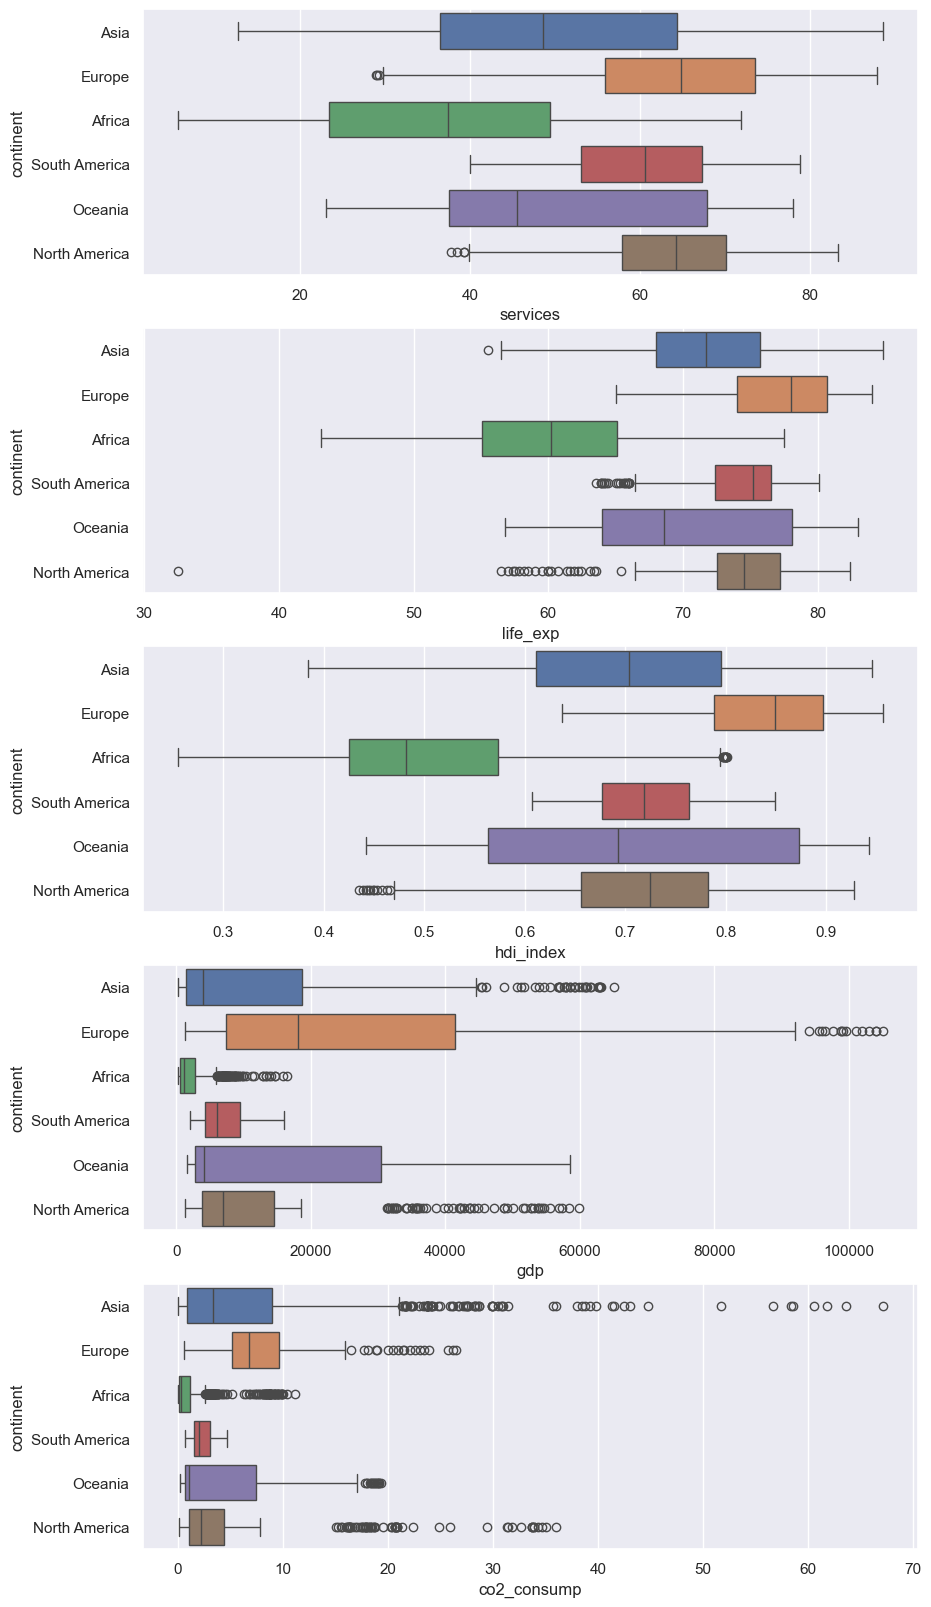

In [185]:
# boxplot comparaison des varibles par continent
fig, ax = plt.subplots(5, 1, figsize = (10, 20))
sns.boxplot(data = df, x = 'services', y = 'continent', ax = ax[0], hue='continent')
sns.boxplot(data = df, x = 'life_exp', y = 'continent', ax = ax[1], hue='continent')
sns.boxplot(data = df, x = 'hdi_index', y = 'continent', ax = ax[2], hue='continent')
sns.boxplot(data = df, x = 'gdp', y = 'continent', ax = ax[3], hue='continent')
sns.boxplot(data = df, x = 'co2_consump', y = 'continent', ax = ax[4], hue='continent')
plt.show()

In [186]:
# Graphique en barres de la consommation de CO2 par continent
fig = px.bar(df, x = 'continent', y = 'co2_consump', color = 'country', title = 'Consommation de CO2 par continent')
fig.show()

In [187]:
fig = px.bar(df, x = 'continent', y = 'life_exp', color = 'continent')
fig.show()

In [188]:
fig = px.bar(df, x = 'continent', y = 'services', color = 'continent')
fig.show()

In [189]:
fig = px.bar(df, x = 'continent', y = 'hdi_index', color = 'continent')
fig.show()

In [190]:
fig = px.bar(df, x = 'continent', y = 'gdp', color = 'continent')
fig.show()

## Corrélation entre les colonnes

On va regarder quelles sont les colonnes qui sont corrélées entre elles pour voir si on peut en déduire quelque chose.

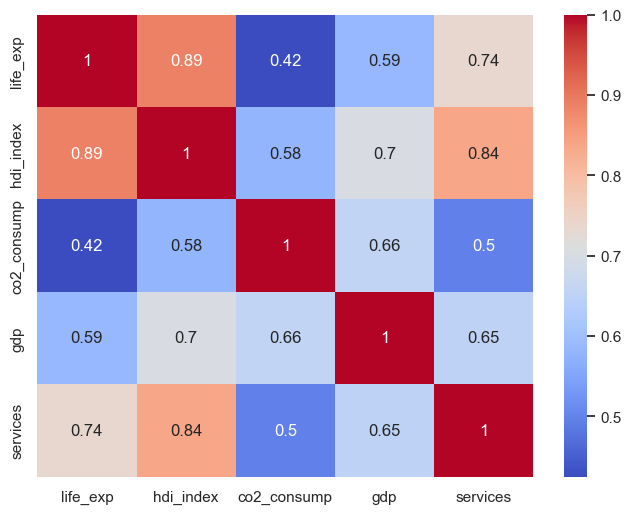

In [191]:
'''
Fonction qui affiche les corrélations entre les colonnes sur une heatmap
'''
def correlation(data):
    correlation = data.corr()
    plt.figure(figsize = (8,6))
    sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

df_num = df.select_dtypes(include = ['float64'])
correlation(df_num)

On remarque que les valeurs des colonnes sont plutôt liées mais on voit notamment une forte corrélation entre l'IDH et l'espérance de vie ce qui est logique car l'IDH est calculé en prenant en compte l'espérance de vie. On observe également une corrélation importante entre l'IDH et le pourcentage de travailleurs dans le secteur tertiaire qui peut s'expliquer par le fait que les pays avec un IDH élevé ont souvent une économie tertiaire développée comme avec le tourisme par exemple.

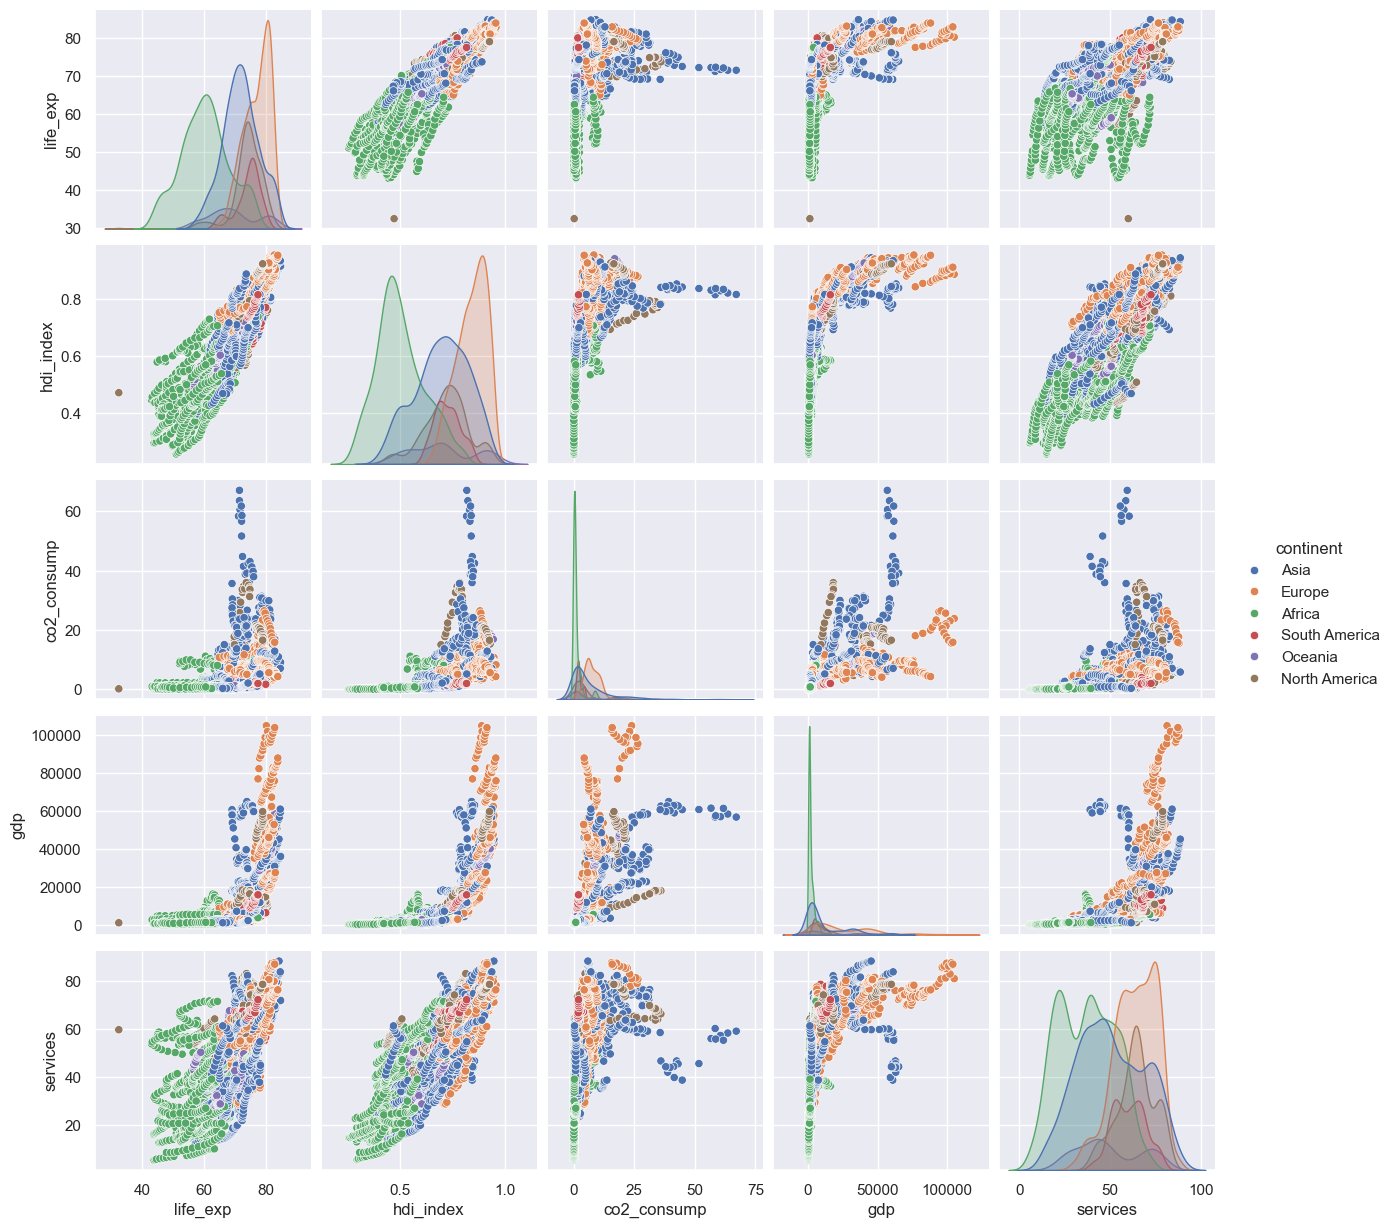

In [192]:
# Affichage des relations entre les colonnes
liste_colonnes = ["continent", "life_exp", "hdi_index", "co2_consump", "gdp", "services"]
sns.pairplot(data=df.loc[:, liste_colonnes], hue="continent")

Ces différents graphiques illustrent bien les corrélations plus ou moins fortes entre les différentes colonnes. Les graphiques avec des points désordonnés et dispersés montrent une faible corrélation entre les colonnes tandis que les graphiques avec des points qui suivent approximativement une droite montrent une corrélation plus forte.

On peut aussi essayer de regarder la corrélation entre les variables numériques et les différents continents pour voir si on peut en déduire quelque chose.

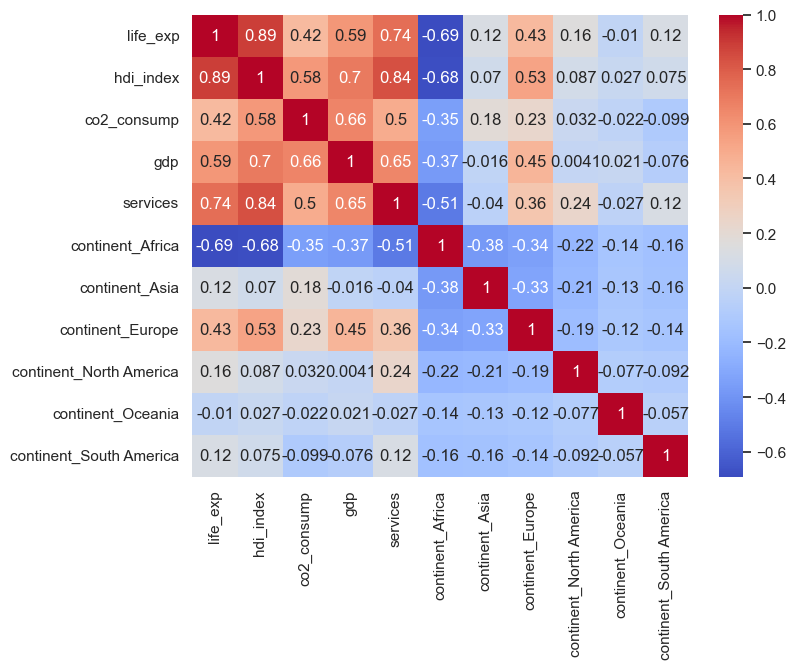

In [193]:
# On ajoute une variable pour chaque continent avec un booléen pour savoir si le pays est dans ce continent
df_variables_continents = pd.get_dummies(df, columns = ['continent'])
df_variables_continents = df_variables_continents.select_dtypes(include = ['float64', 'bool'])

# Corrélation entre les variables
correlation(df_variables_continents)

On peut s'apercevoir ici que les coefficients de corrélation entre nos variables et les continents sont très différents selon les continents. Ceux-ci sont vont de 0.23 à 0.53 pour l'Europe tandis qu'ils sont situés entre -0.69 et -0.35 pour l'Afrique. Il est possible d'expliquer cela par le fait que l'Europe est un continent développé et possède donc des valeurs élevées pour l'IDH, le PIB par habitant ou l'espérance de vie alors que l'Afrique est un continent en développement et possède donc des valeurs plus faibles pour ces mêmes variables.

## Clustering

In [194]:
# Import
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
import seaborn as sns

sns.set() # Pour faire des modélisations plus jolies

On va commencer par normaliser les données car les variables sont sur des échelles différentes.

In [195]:
# Normalisation des données
scaler = StandardScaler()
df_normalise = scaler.fit_transform(df_num)
df_normalise = pd.DataFrame(df_normalise, columns=df_num.columns, index=df_num.index) # Dataframe normalisé sans les colonnes catégorielles
df_complet_normalise = df.copy()
df_complet_normalise[df_num.columns] = df_normalise # Dataframe normalisé avec toutes les colonnes

'''
Méthode qui permer de dénormaliser les données
'''
def denormalisation(data):
    df_denormalise = scaler.inverse_transform(data[df_num.columns])
    df_denormalise = pd.DataFrame(df_denormalise, columns=df_num.columns)
    df_complet_denormalise = df.copy()
    df_complet_denormalise[df_num.columns] = df_denormalise
    return df_complet_denormalise

On va ensuite essayer de trouver le nombre de clusters optimal pour notre jeu de données. Pour cela, on utiliser la méthode du coude et ne prendre en compte que les colonnes numériques.

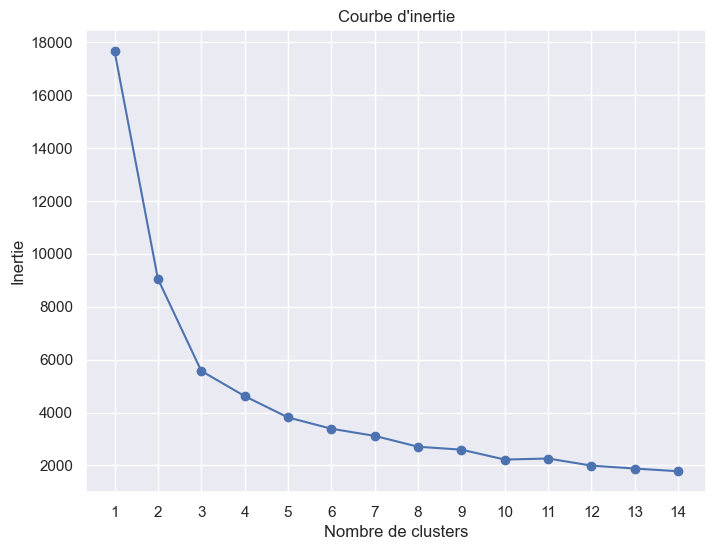

In [196]:
'''
Méthode qui permet de trouver le meilleur nombre de clusters pour KMeans
'''
def meilleur_nombre_classe_kmeans(df):
    inerties = []
    nombre_clusters = range(1, 15) 
    
    # On applique KMeans pour chaque nombre de clusters
    for k in nombre_clusters:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inerties.append(kmeans.inertia_)
    
    # On affiche la courbe d'inertie
    plt.figure(figsize=(8, 6))
    plt.plot(nombre_clusters, inerties, marker='o')
    plt.title("Courbe d'inertie")
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.xticks(nombre_clusters)
    plt.show()
    
meilleur_nombre_classe_kmeans(df_normalise)

On voit avec l'utilisation de la méthode du coude que le nombre optimal de clusters est de 3. On peut donc essayer de faire un clustering avec 3 clusters pour voir si on peut dégager quelque chose.

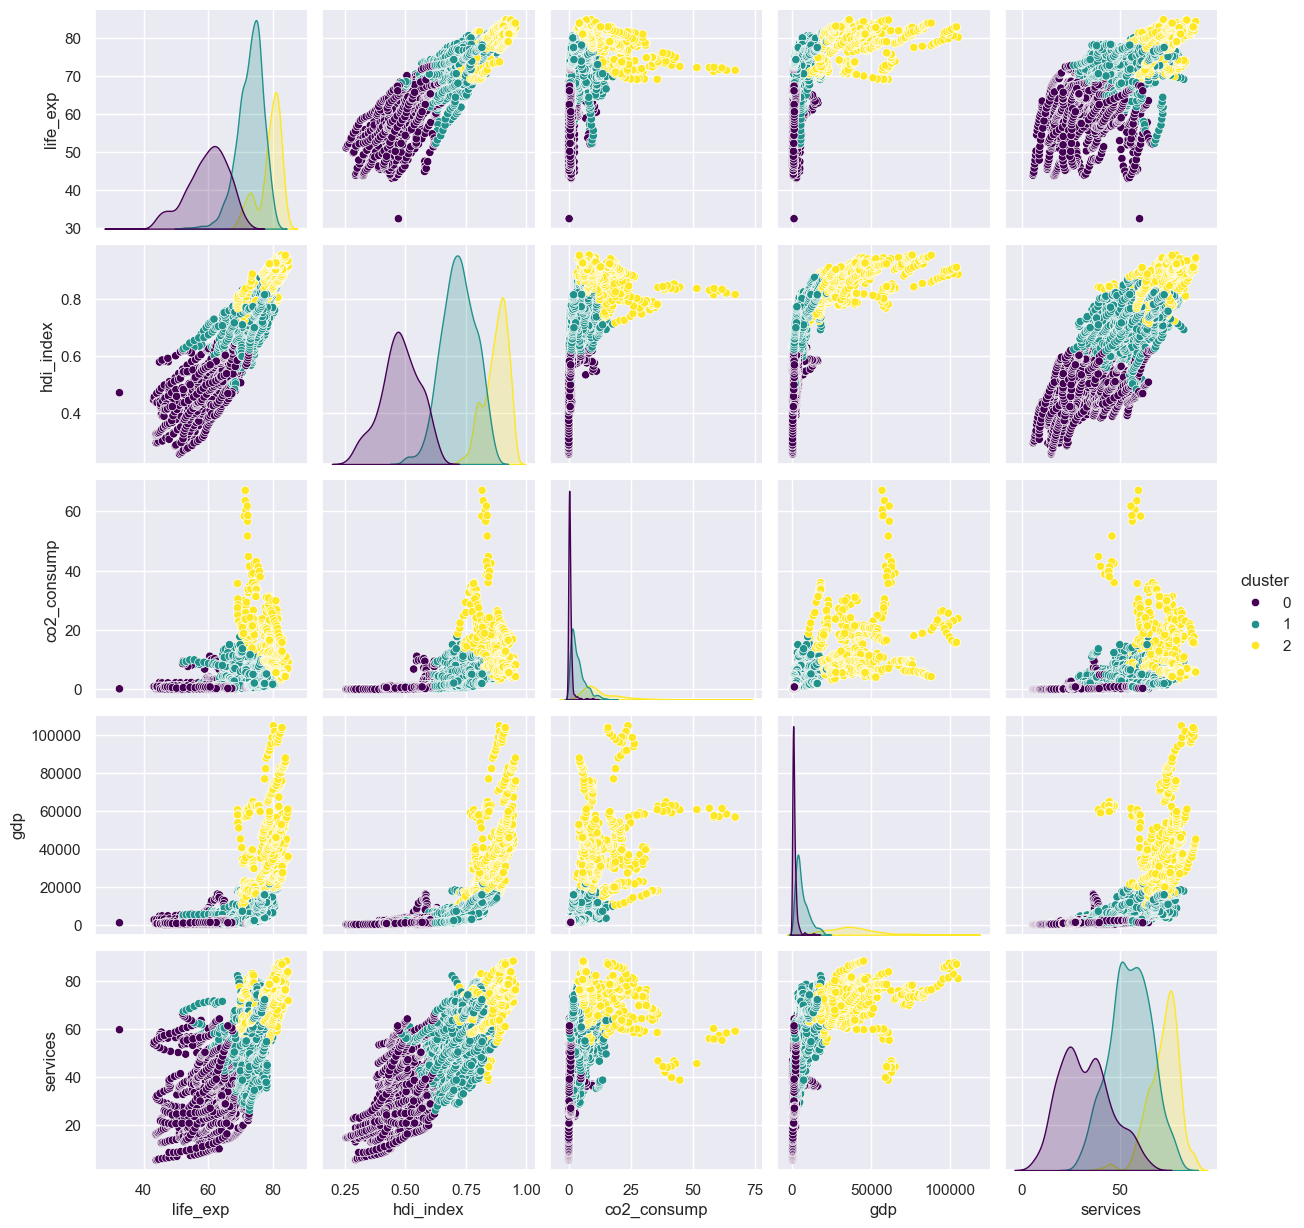

In [236]:
# Kmeans avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalise)

# On dénormalise les données
df_kmeans = denormalisation(df_normalise)
df_kmeans = df_kmeans.select_dtypes(include = ['float64'])

# On ajoute les clusters au dataframe pour les afficher
labels = kmeans.labels_
df_kmeans["cluster"] = labels
sns.pairplot(df_kmeans, hue="cluster", palette="viridis")

continent      cluster
Africa         0          801
               1          207
Asia           0          232
               1          448
               2          259
Europe         1          404
               2          403
North America  0           28
               1          285
               2           80
Oceania        0           55
               1           63
               2           42
South America  0            3
               1          222
dtype: int64


<Axes: xlabel='continent'>

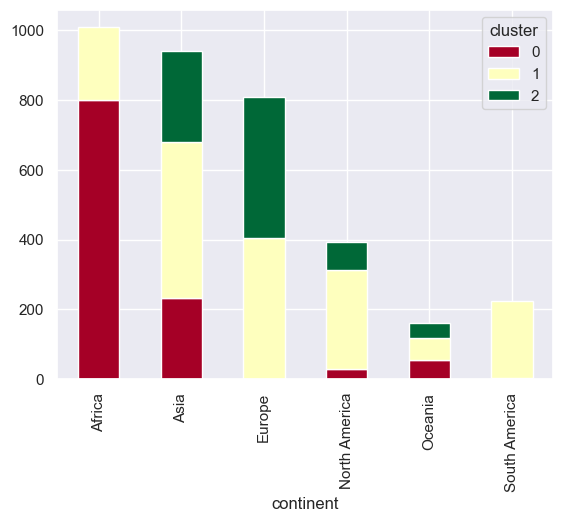

In [237]:
# On regarde pour chaque continent la répartition des clusters
df_kmeans["continent"] = df["continent"]
print(df_kmeans.groupby(["continent", "cluster"]).size())
df_kmeans.groupby(["continent", "cluster"]).size().unstack().plot(kind='bar', stacked=True, colormap='RdYlGn')

On voit ici la répartition des données pour chaque cluster dans les différents continents. On remarque clairement que les clusters ne sont pas répartis de la même manière selon les continents. En effet, les pays africains sont majoritairement dans le cluster 0 alors qu'aucun d'entre eux ne se trouve dans le cluster 2. Au contraire, les pays européens sont exclusivement dans les clusters 1 et 2. On peut donc en déduire que ces clusters correspondent à des niveaux de développement différents et que le premier correspond à des pays moins développés tandis que les deux autres correspondent à des pays plus développés.

On va essayer de faire un clustering avec DBSCAN pour voir si on a des résultats similaires.

eps=0.20, Score de silhouette=-0.27
eps=0.30, Score de silhouette=-0.35
eps=0.40, Score de silhouette=-0.22
eps=0.50, Score de silhouette=-0.14
eps=0.60, Score de silhouette=-0.15
eps=0.70, Score de silhouette=-0.18
eps=0.80, Score de silhouette=0.04
eps=0.90, Score de silhouette=0.50
eps=1.00, Score de silhouette=0.34
eps=1.10, Score de silhouette=0.34


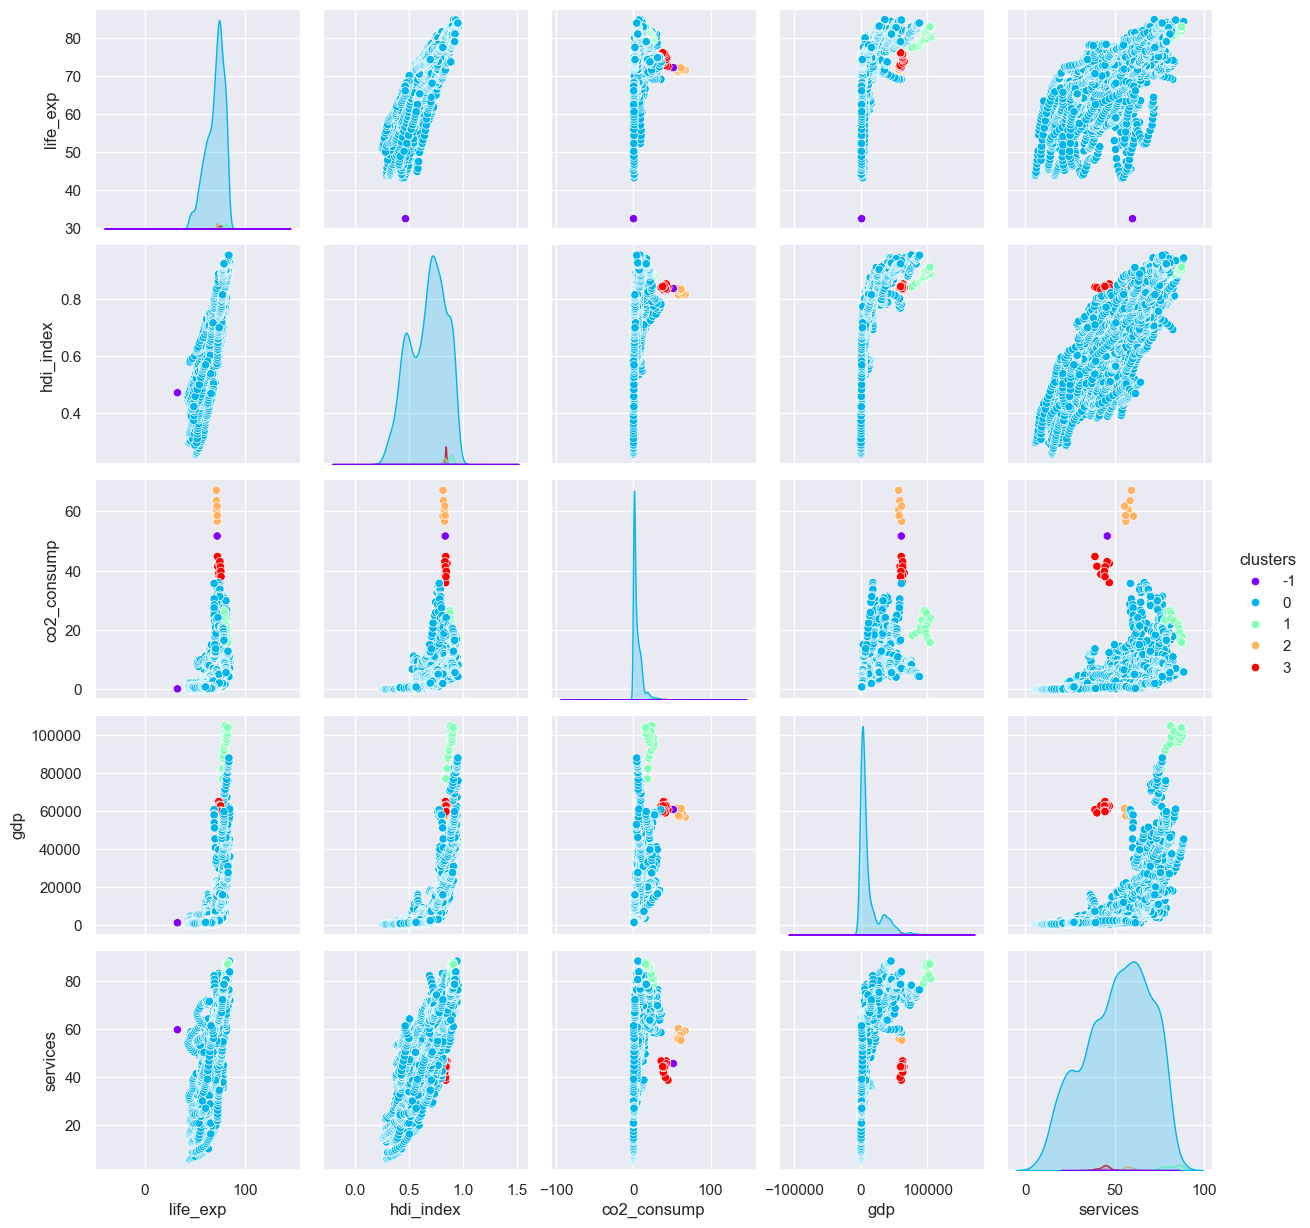

In [199]:
# On teste différentes valeurs de epsilon pour DBSCAN
def test_epsilon_dbscan(df):   
    for eps in np.arange(0.2, 2, 0.1):
        db = DBSCAN(eps=eps, min_samples=3).fit(df)
        labels = db.labels_
        # On regarde si on a plus d'un cluster
        if len(set(labels) - {-1}) > 1:
            score = silhouette_score(df, labels)
            print(f"eps={eps:.2f}, Score de silhouette={score:.2f}")
    
test_epsilon_dbscan(df_normalise)

# On applique DBSCAN avec epsilon=0.9 car c'est la valeur qui donne le meilleur score de silhouette
dbscan = DBSCAN(eps=0.9, min_samples=3)
clusters = dbscan.fit_predict(df_normalise)

# On dénormalise les données
df_dbscan = denormalisation(df_normalise)
df_dbscan = df_kmeans.select_dtypes(include = ['float64'])

# On ajoute les clusters au dataframe pour les afficher
labels = dbscan.labels_
df_dbscan["clusters"] = labels
sns.pairplot(df_dbscan, hue="clusters", palette="rainbow")

Les résultats obtenus avec DBScan ne sont pas très concluants car on a une grande majorité de points dans le même cluster et seuls les points qui sont très éloignés des autres sont dans un autre cluster. On peut néanmoins s'intéresser à ces points pour voir si on peut en déduire quelque chose.

In [200]:
# On regarde pour chaque cluster les pays qu'il contient
df_dbscan["country"] = df["country"]
df_dbscan.groupby(["clusters", "country"]).size()

clusters  country    
-1        Haiti           1
          Qatar           1
 0        Afghanistan    17
          Albania        21
          Algeria        21
                         ..
          Zambia         21
          Zimbabwe       21
 1        Luxembourg     21
 2        Qatar           7
 3        Qatar          11
Length: 178, dtype: int64

On remarque plusieurs choses intéressantes. Tout d'abord, on a la présence d'Haiti dans un cluster à part et lorsque l'on regarde les valeurs de ses colonnes, on observe qu'en 2010, l'espérance de vie descend à 32.5 ans avant de remonter l'année suivante. En faisant quelques recherches, on constate que cette baisse est due à un tremblement de terre qui a eu lieu en 2010 et qui a causé la mort de plusieurs centaines de milliers de personnes et donc une baisse de l'espérance de vie.

On peut également s'intéresser à la présence du Luxembourg dans un cluster à part. En effet, le pays est présent dans le cluster 1 pour chacune des années de notre jeu de données. Lorsqu'on regarde les valeurs de ses colonnes, on observe que le pays a des valeurs plus élevées que tous les autres pays pour le PIB par habitant ainsi que pour l'émission de CO2, ce qui est bien le cas dans la réalité. On peut donc en déduire que le clustering a bien fonctionné pour ce pays.

Enfin, on voit que le Qatar se retrouve dans plusieurs clusters mais séparé des autres pays. Etant donné que c'est un pays qui émet beaucoup de CO2, c'est pour cette raison que les points le représentant sont éloignés des autres et se retrouvent dans des clusters à part.

On peut terminer par tester une autre méthode de clustering avec le modèle de mélanges gaussien.

n_components=2, Score de silhouette=0.35
n_components=3, Score de silhouette=0.30
n_components=4, Score de silhouette=0.30
n_components=5, Score de silhouette=0.23
n_components=6, Score de silhouette=0.16


c:\Users\tomhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



n_components=7, Score de silhouette=0.15
n_components=8, Score de silhouette=0.18
n_components=9, Score de silhouette=0.19


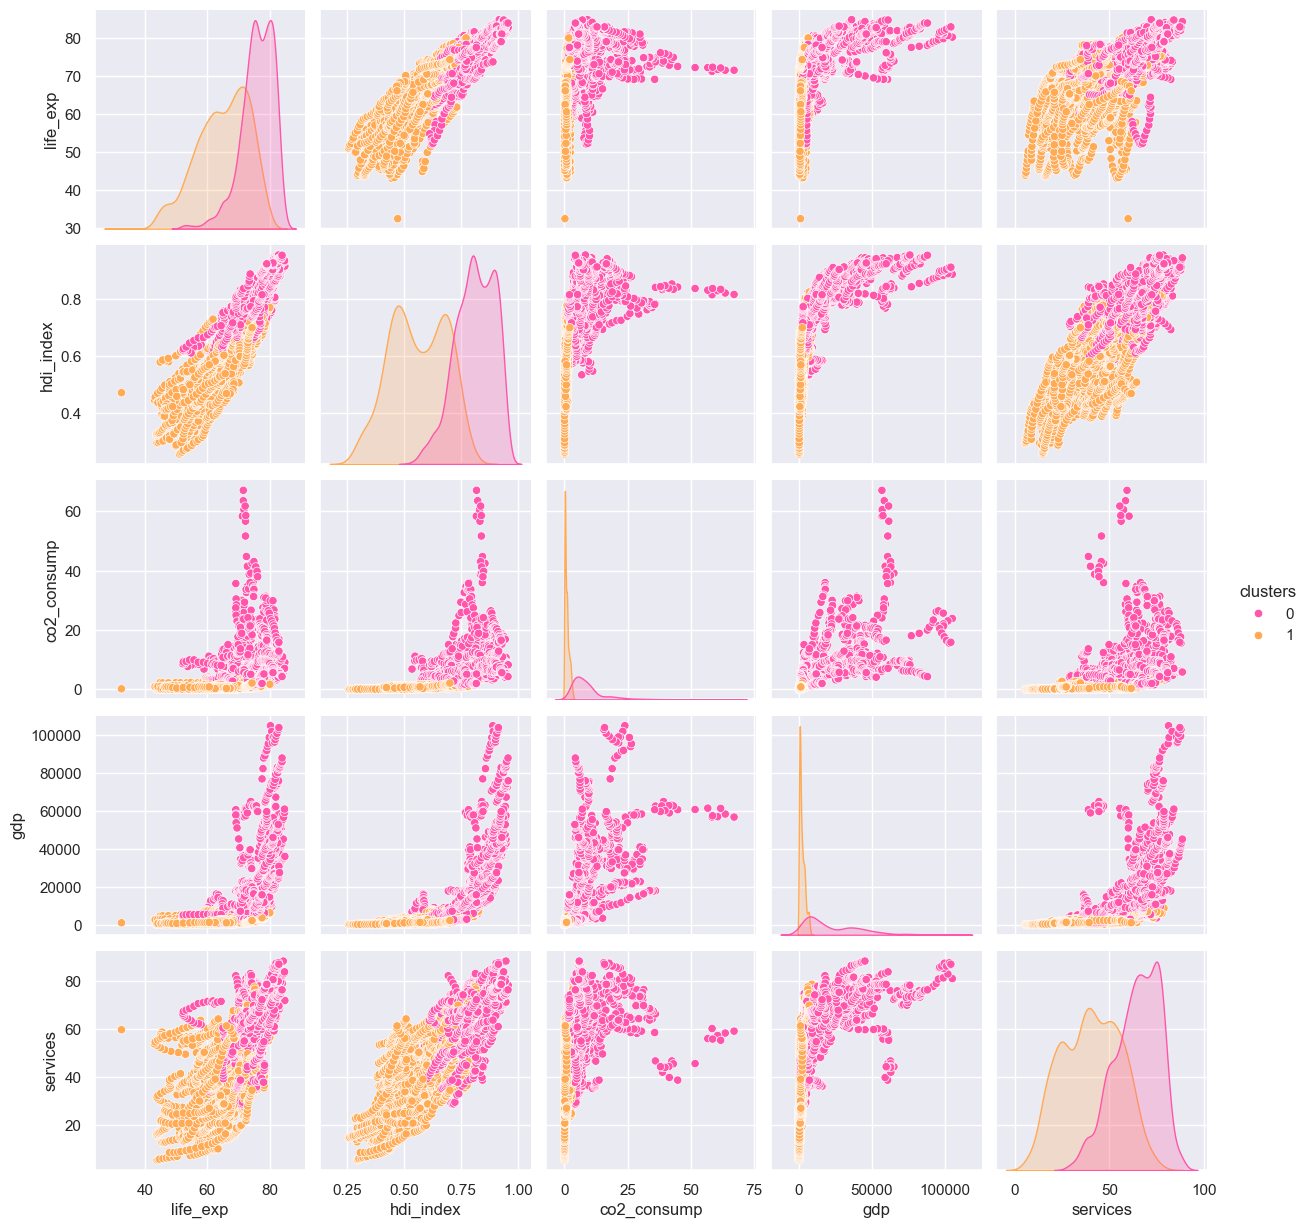

In [201]:
# On teste différentes valeurs de nombre de composants pour le modèle de mélange gaussien
def test_nombre_composants_bgm(df):
    for n_components in range(2, 10):
        bgm = BayesianGaussianMixture(n_components=n_components)
        bgm.fit(df)
        labels = bgm.predict(df)
        score = silhouette_score(df, labels)
        print(f"n_components={n_components}, Score de silhouette={score:.2f}")
        
test_nombre_composants_bgm(df_normalise)

# On applique le modèle de mélange gaussien avec 2 composants
bgm = BayesianGaussianMixture(n_components=2)
bgm.fit(df_normalise)

# On dénormalise les données
df_bgm = denormalisation(df_normalise)
df_bgm = df_bgm.select_dtypes(include = ['float64'])

# On ajoute les clusters au dataframe pour les afficher
labels = bgm.predict(df_normalise)
df_bgm["clusters"] = labels
sns.pairplot(df_bgm, hue="clusters", palette="spring")

Nombre de points par cluster :
clusters
0    1667
1    1865
dtype: int64


<Axes: xlabel='continent'>

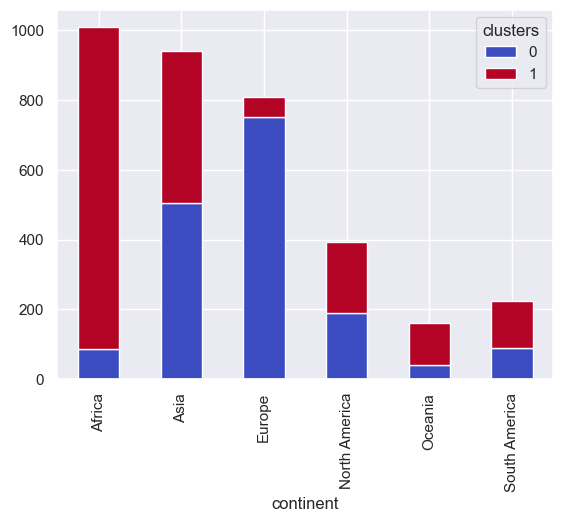

In [202]:
# On regarde pour chaque continent la répartition des clusters
df_bgm["continent"] = df["continent"]
print("Nombre de points par cluster :")
print(df_bgm.groupby(["clusters"]).size())
df_bgm.groupby(["continent", "clusters"]).size().unstack().plot(kind='bar', stacked=True, colormap='coolwarm')

On obtient deux clusters de taille similaire avec le modèle de mélanges gaussien mais cela ne nous apporte pas d'informations supplémentaires par rapport aux autres méthodes de clustering. On imagine que les pays sont répartis en deux clusters en fonction de leur niveau de développement mais cela ne nous apprend rien de plus.

En conclusion, on peut dire que les différentes méthodes de clustering nous ont permis de mettre en évidence des groupes de pays qui ont des caractéristiques similaires et qui peuvent être regroupés ensemble. Cela nous a permis de voir que les pays sont répartis en fonction de leur niveau de développement et que les pays les moins développés se retrouvent principalement en Afrique tandis que les pays les plus développés se retrouvent en Europe.

## Transformation de données

In [203]:
# Imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Encodage des variables catégorielles

On décide de garder KMeans comme méthode de clustering car c'est celle qui nous a donné les meilleurs résultats. On commence par utiliser un objet ColumnTransformer pour transformer les données et prendre en compte cette fois toutes les colonnes pour trouver le nombre optimal de clusters.

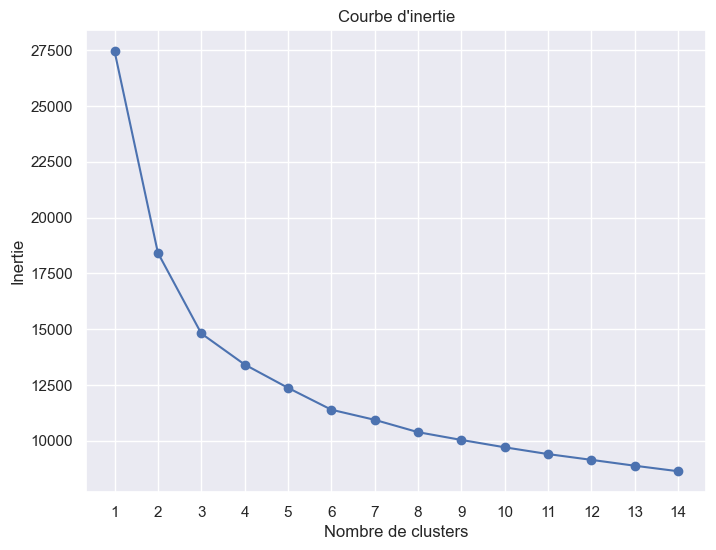

In [204]:
'''
Fonction qui permet d'encoder les variables catégorielles
'''
def encodage(df):
    # On récupère les colonnes numériques et catégorielles
    colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
    colonnes_objets = df.select_dtypes(include=['object']).columns
    
    # On crée un objet ColumnTransformer qu'on applique sur le dataframe
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), colonnes_numeriques),
            ('cat', OneHotEncoder(), colonnes_objets)
        ])
    X = preprocessor.fit_transform(df)
    return X

df_encode = encodage(df_complet_normalise)
    
meilleur_nombre_classe_kmeans(df_encode)

On voit avec l'utilisation de la méthode du coude que le nombre optimal de clusters est toujours de 3. On peut donc essayer de faire un clustering avec 3 clusters pour voir si on peut dégager quelque chose.

continent      cluster
Africa         0          820
               1          188
Asia           0          206
               1          474
               2          259
Europe         1          392
               2          415
North America  0           23
               1          290
               2           80
Oceania        0           55
               1           63
               2           42
South America  0            2
               1          223
dtype: int64


<Axes: xlabel='continent'>

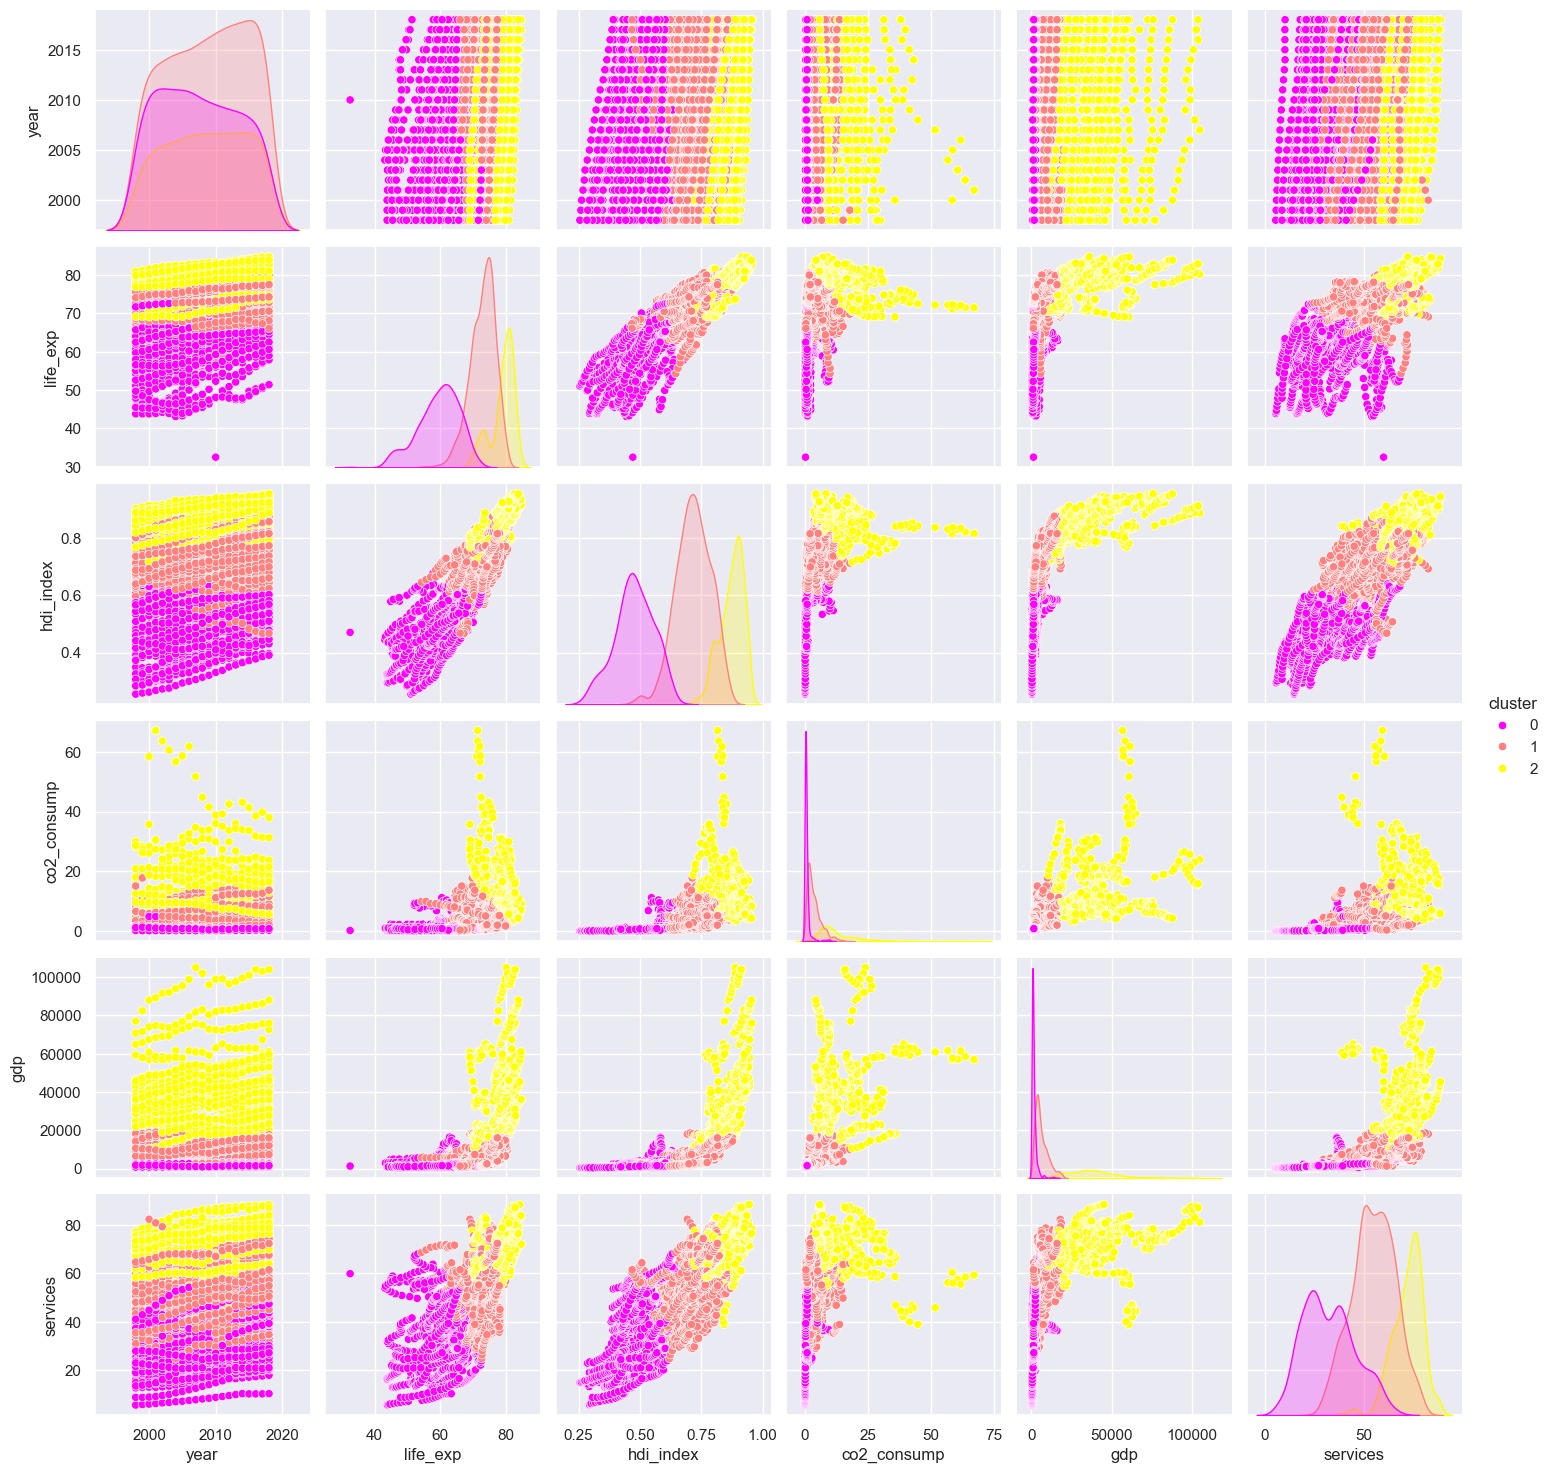

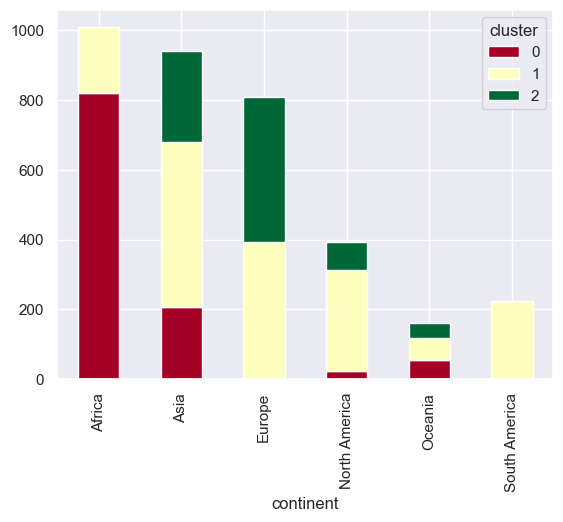

In [240]:
# Kmeans avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_encode)

# On ajoute les clusters au dataframe pour les afficher
labels = kmeans.labels_
df_kmeans = df.copy()
df_kmeans["cluster"] = labels
sns.pairplot(df_kmeans, hue="cluster", palette="spring")

# On regarde pour chaque continent la répartition des clusters
df_kmeans["continent"] = df["continent"]
print(df_kmeans.groupby(["continent", "cluster"]).size())
df_kmeans.groupby(["continent", "cluster"]).size().unstack().plot(kind='bar', stacked=True, colormap='RdYlGn')

Il n'y a pas de différence majeure dans les résultats obtenus que ce soit en prenant en compte toutes les colonnes ou seulement les colonnes numériques.

### Réduction de dimensions

On va essayer de réduire la dimension de nos données pour voir si on peut obtenir de meilleurs résultats. On commence par utiliser PCA en cherchant le nombre de composantes qui explique au moins 80% de la variance.

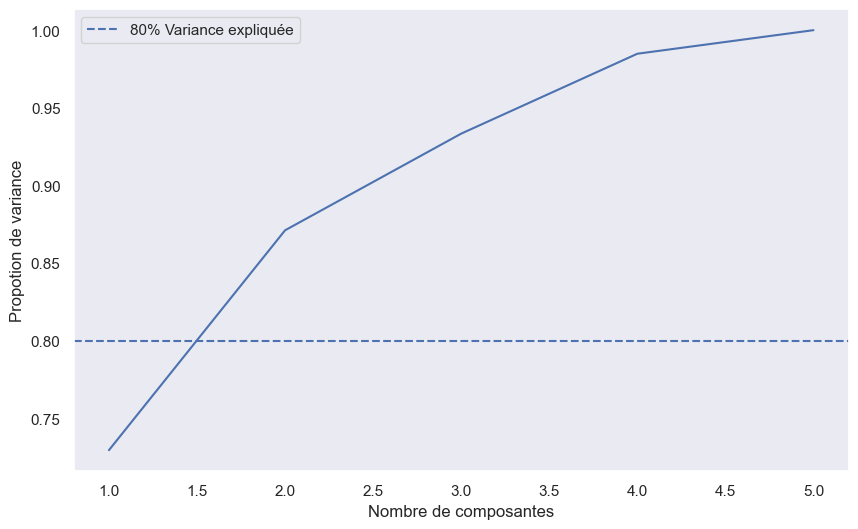

In [206]:
# On teste le nombre de composants pour le PCA
pca = PCA()
pca.fit(df_normalise)
variance_expliquee = pca.explained_variance_ratio_  # Variance expliquée pour chaque composante
variance_cumulee = np.cumsum(variance_expliquee)  # Variance cumulée

# Affichage de la courbe de variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee)
plt.xlabel('Nombre de composantes')
plt.ylabel('Propotion de variance')
plt.grid()
plt.axhline(y=0.8, linestyle='--', label='80% Variance expliquée')
plt.legend()
plt.show()

En fixant un seuil à 80%, on trouve que l'on peut garder seulement 2 composantes principales pour garder suffisamment d'informations. On peut donc essayer de faire un clustering avec ce nombre de composantes pour voir si on peut obtenir de meilleurs résultats.

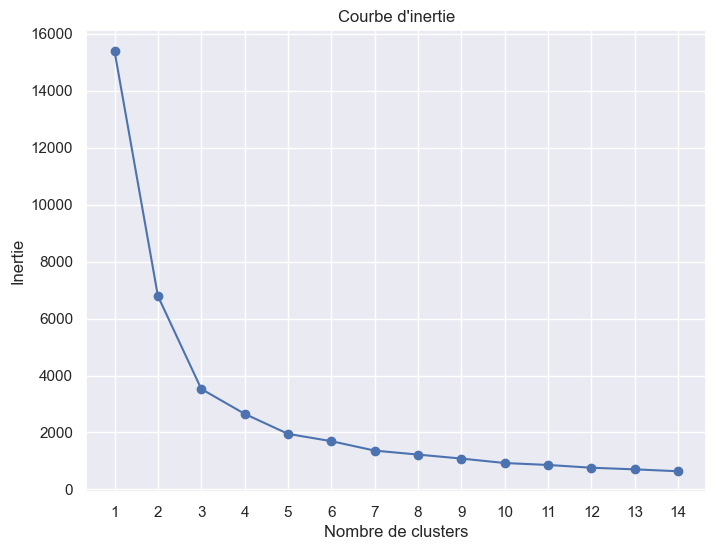

In [207]:
# On applique PCA avec 2 composants
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalise)

# On cherche le meilleur nombre de clusters pour KMeans
meilleur_nombre_classe_kmeans(df_pca)

Garder 3 clusters est toujours le meilleur choix pour notre jeu de données.

In [208]:
# Kmeans avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)

# On crée un dataframe avec les composantes principales et les clusters
clusters = pd.Series(kmeans.predict(df_pca))
tableau = pd.DataFrame(df_pca, columns=["x", "y"])
tableau["cluster"] = clusters

# Afficher avec les pays sur le graphique
tableau["country"] = df["country"]
fig = px.scatter(tableau, x="x", y="y", color="cluster", hover_name="country")
fig.show()

La méthode PCA nous permet une meilleure visualisation des clusters obtenus. On retrouve les mêmes clusters que précédemment mais on peut mieux les distinguer.

On peut essayer une autre méthode de réduction de dimensions avec t-SNE pour voir si on obtient ces mêmes résultats.

In [209]:
# On applique TSNE
tsne = TSNE(n_components=2, perplexity=20)
df_tsne = tsne.fit_transform(df_normalise)

# Kmeans avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_tsne)
clusters = kmeans.labels_
df_tsne = pd.DataFrame(df_tsne, columns=['x', 'y'])
df_tsne['cluster'] = clusters 

# Afficher avec les pays sur le graphique
df_tsne["country"] = df["country"]
fig = px.scatter(df_tsne, x="x", y="y", color="cluster", hover_name="country")
fig.show()

## Analyse temporelles et spatiales

In [210]:
# Création d'un graphique qui montre l'évolution de l'IDH et du % de services en fonction de l'année
df_complet = pd.read_csv('gapminder_data_graphs.csv')
graphique = px.scatter(df_complet, x = "hdi_index",  y = "services", color = "continent", animation_frame="year", range_x=[0,1], range_y= [0, 100])
graphique.show()